imported libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline
import math

✨DATA ANALYSIS✨


loaded the files 

In [5]:
transaction=pd.read_csv("/Users/i Dolphin Online/Downloads/QVI_transaction_data.csv")
purchase=pd.read_csv("/Users/i Dolphin Online/Downloads/QVI_purchase_behaviour.csv")
transaction.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


In [6]:
purchase.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream


There are 7 categories of customer buying habits and they are classified in premium, mainstream and budget according to their purchasing power.

<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='count'>

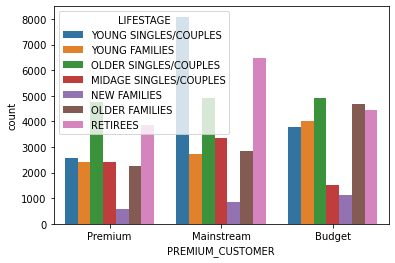

In [7]:
sns.countplot(x="PREMIUM_CUSTOMER",hue="LIFESTAGE",data=purchase)

Most of the premium customers are old and retirees. Most of the mainstream are young and retirees. Most of the budget customers are young older families, singles and couples.
Older single/couples should be targeted more as they are premium customers, for gaining more profit they should be targeted so that they become highest range customers in mainstream.


<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

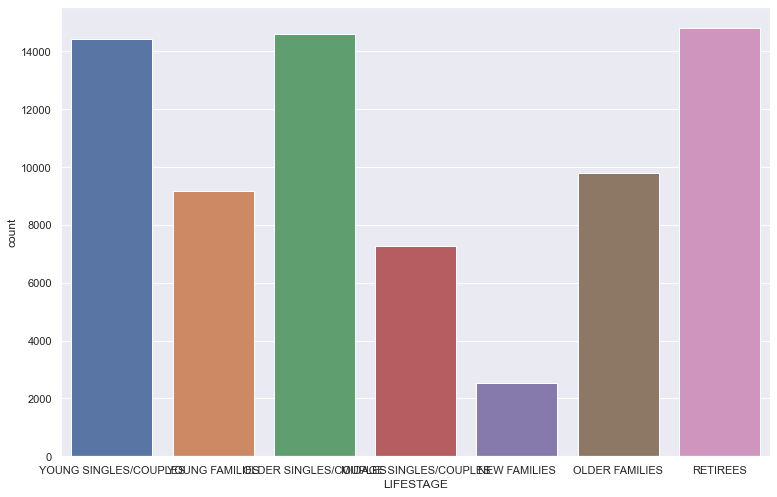

In [9]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.countplot(x="LIFESTAGE",data=purchase)

New families do not buy a lot from store, products for new families should be introduced in the store.

In [10]:
type(transaction["PROD_QTY"])

pandas.core.series.Series

In [11]:
maxv=max(transaction["PROD_QTY"])
list(transaction["PROD_QTY"]).index(maxv)

69762

In [12]:
transaction.loc[69762, "PROD_NAME"]

'Dorito Corn Chp     Supreme 380g'

Maximum quantity of product sold is of 200 and through the index I got to know the product name is Dorito Corn Chip     Supreme 380g.

DATA WRANGLING

checking for any missing values

In [13]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [18]:
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

checking for outliers in the data

<AxesSubplot:xlabel='PROD_QTY'>

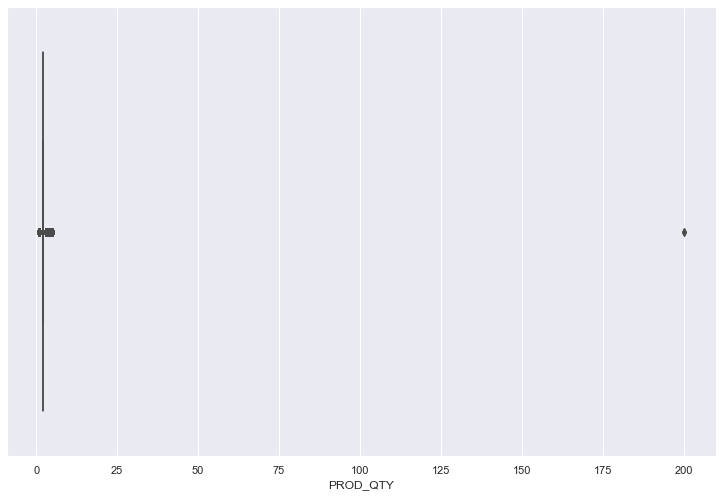

In [14]:
sns.boxplot(x=transaction["PROD_QTY"])

<AxesSubplot:xlabel='TOT_SALES'>

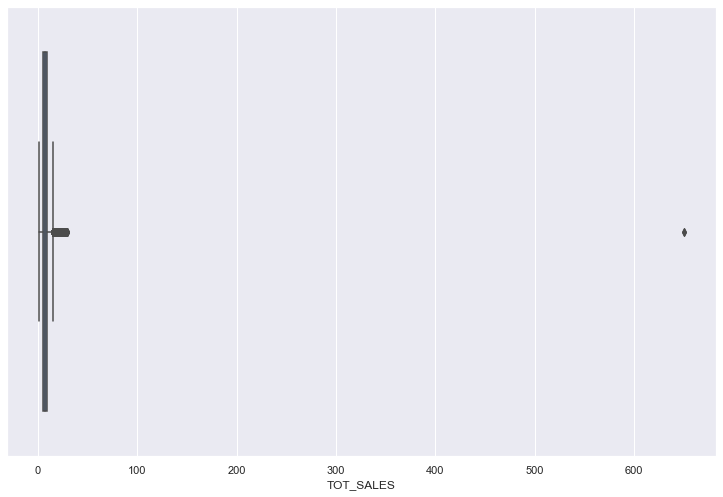

In [15]:
sns.boxplot(x=transaction["TOT_SALES"])


Removing outliers

In [19]:
for x in ['PROD_QTY']:
    q75,q25 = np.percentile(transaction.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    transaction.loc[ transaction[x] < min,x] = np.nan
    transaction.loc[ transaction[x] > max,x] = np.nan

<AxesSubplot:xlabel='PROD_QTY'>

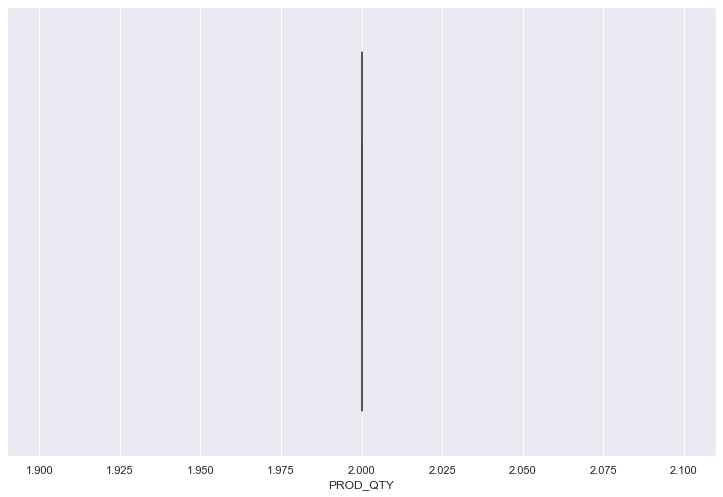

In [20]:
sns.boxplot(x=transaction["PROD_QTY"])


<AxesSubplot:xlabel='TOT_SALES'>

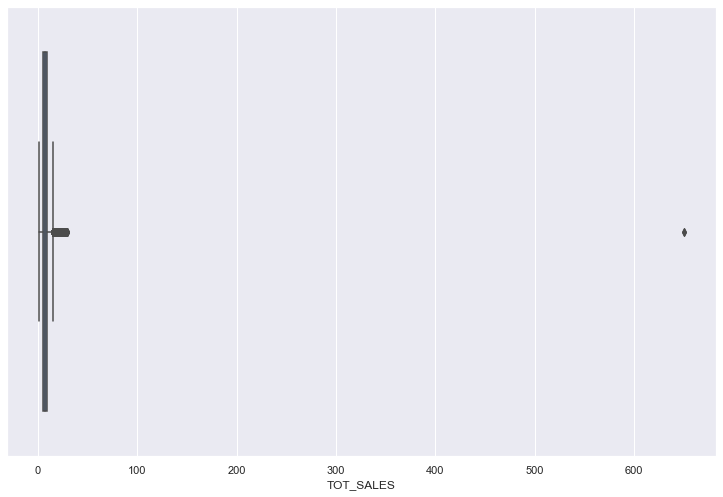

In [21]:
sns.boxplot(x=transaction["TOT_SALES"])

Removing missing values after outlier removal

In [22]:
transaction.isnull().sum()


DATE                  0
STORE_NBR             0
LYLTY_CARD_NBR        0
TXN_ID                0
PROD_NBR              0
PROD_NAME             0
PROD_QTY          28797
TOT_SALES             0
dtype: int64

In [23]:
transaction = transaction.dropna(axis = 0)

In [24]:
transaction.isnull().sum()


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

<AxesSubplot:xlabel='TOT_SALES'>

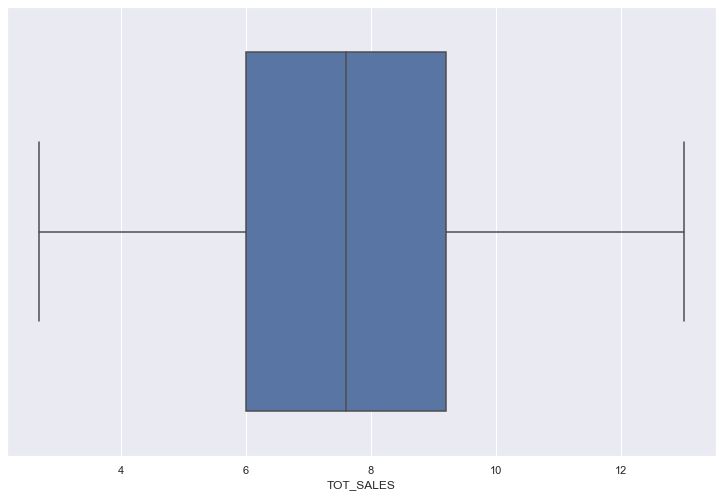

In [25]:
sns.boxplot(x=transaction["TOT_SALES"])

Removing unnecessary columns from the data

In [45]:
transaction = transaction.drop(["DATE","STORE_NBR","LYLTY_CARD_NBR","TXN_ID","PROD_NAME"], axis=1)

In [46]:
transaction.head(3)

,PROD_NBR,PROD_QTY,TOT_SALES
0,5,2.0,6.0
2,61,2.0,2.9
9,52,2.0,7.2


In [42]:
purchase=pd.read_csv("/Users/i Dolphin Online/Downloads/QVI_purchase_behaviour.csv")

purchase=purchase.drop(["LYLTY_CARD_NBR"],axis=1)


In [43]:
purchase.head(3)

,LIFESTAGE,PREMIUM_CUSTOMER
0,YOUNG SINGLES/COUPLES,Premium
1,YOUNG SINGLES/COUPLES,Mainstream
2,YOUNG FAMILIES,Budget
